# DS200: Introduction to Data Sciences
## Fall 2024
# Lab Assignment 4: Hypothesis Testing (2 points)
## Due: midnight, September 25th


In [11]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from datascience import *
import numpy as np

# Part 1: Introduction

Hypothesis testing is a statistical method that can be used to answer questions such as
- Does medicine A improve the health outcome of condition X after 7 days?

The first step in hypothesis testing is to come up with the research hypothesis, which is a statement (like the one above) that can be tested statistically and involves the comparison of variables, e.g. drug X can lower blood pressure more than a placebo. We then specify the null hypothesis  $𝐻_0$, which states that the effect is not present; in a randomized controlled experiment, this means that there is no significant difference between the treatment group and the control group, and any observed difference is due to chance. In contrast, the alternative hypothesis  $𝐻_A$  states that the effect is actually present, and there is significant difference observed between the treatment group and the control group.

In more general terms, the null hypothesis is the default case, generally reflecting the current common conception of the world (e.g. drug has no effect). The alternative hypothesis is the one you are testing (e.g. drug has effect).

### Problem 1: Defining Hypotheses (0.3 points)

For each research hypothesis below, define what the null hypothesis and the alternative hypothesis should be.

*   RH1: Families living in State College tend to own more cars than the national average.
*   RH2: Exercise reduces the risk of obesity.
*   RH3: Smoking causes lung cancer.





## Solution for problem 1.
Write your solution to Problem 1 in this text cell.

- Null hypothesis for RH1 is: Families living in State College own the same amount of cars as the national average.

- Alternative hypothesis for RH1 is: Families living in State College own more cars than the national average.

- Null hypothesis for RH2 is: Exercise does not reduce the risk of obesity.

- Alternative hypothesis for RH2 is: Exercise does reduce the risk of obesity.

- Null hypothesis for RH3 is: Smoking does not cause lung cancer.

- Alternative hypothesis for RH3 is: Smoking does cause lung cancer.

# Part 2: Test Statistic and $p$-Value

There is a key word in the description of hypothesis testing above "there is a significant difference observed between the treatment group and the control group" -- **significant difference**.

What does it mean to have a significant difference?
How do we determine whether the difference is significant or not? The answers to these question
is an important test statistic measure called **p-value**.

A test statistic is a numerical quantity computed from a sample of the population. In hypothesis testing, a test statistic measures how far
the variable of interest (e.g., percentage of patient who recovers from a disease after receiving a medication) in a sample differs from what we expect under the null hypothesis.

Recall in Lab 3, the average of a variable in a sample
(e.g., income, age, etc) can deviate from the average of the entire population.  Even though the deviation
can, on the average, reduce as the size of sample increases (as stated in Large Number Theory), the
deviation can not be completely eliminated.  Therefore, if we draw two random samples from a population and compare average of a variable in
the two samples, **there will be differences due
to chances and the limit of sample size**.

Therefore, we need a systematic way to determine
whether the observed difference between two samples (e.g., experiment group and control group) is due
to chances (i.e., Null Hypothesis) or due to the
intervention (i.e., Alterative Hypothesis).

Let us look at an example.

A human resource specialist working at an IT company is interested in the overwork time of different teams. To investigate whether there is a difference between the overtime of the software development team and the test team, the specialist selected 17 employees randomly from each of the two teams and recorded their weekly average overwork time in hours. The data is below:

In [12]:
developer_team = make_array(2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4)
test_team = make_array(6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1)

By comparing the averages of the two samples, the HR specialist, not familiar with data science, might conclude that the test team works much harder since their average overtime is higher:

In [13]:
print("Developers' average:", np.average(developer_team))
print("Testers' average:", np.average(test_team))

Developers' average: 3.77647058824
Testers' average: 4.26470588235


In [14]:
# Calculate the difference of the average from the two groups
observed_overtime_diff = np.average(test_team) - np.average(developer_team)
print(observed_overtime_diff)

0.488235294118


But could this difference have been caused by chance alone? After all, our samples were drawn at random.

To answer this question, we will conduct rigorous hypothesis testing to determine whether there is a significant difference between the overwork times of the two teams.

## Problem 2A: Defining Hypotheses for Overwork Time Testing (0.2 points)

First, we need to formulate a null hypothesis and an alternative hypothesis. What should these be?


## Solution for Problem 2A: Write your answer to Problem 2A in this text cell.
- Null hypothesis is: There is no significant difference in the amount of overwork time compared from the developer team to the test team.
- Alternative hypothesis is: There is a significant different in the amount of overwork time compared from the developer team to the test team.

### Step 1: Test Statistic

A test statistic measures how far the sample is from what we expect under the null hypothesis (i.e., the difference is due to chances in sampling, not real differences between the two groups). We can simulate the value of the test statistic under the null hypothesis to obtain its probability distribution under the null hypothesis. In the overwork time example, the test statistic can be the absolute difference in average overwork time between the two teams.

### Step 2: Simulating Distribution under Null Hypothesis

The following code simulates the value of the test statistic under the null hypothesis. Note that we do not know the population distribution from which the development and test teams' samples were drawn. However, we can simulate it: since samples resemble the population distribution (see the Law of Averages), we can combine the data from the two samples to form the population distribution (of overtime from those in the Developer's team and in the Tester's team).

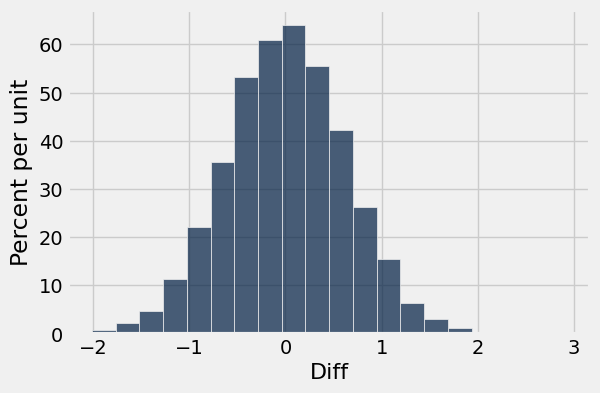

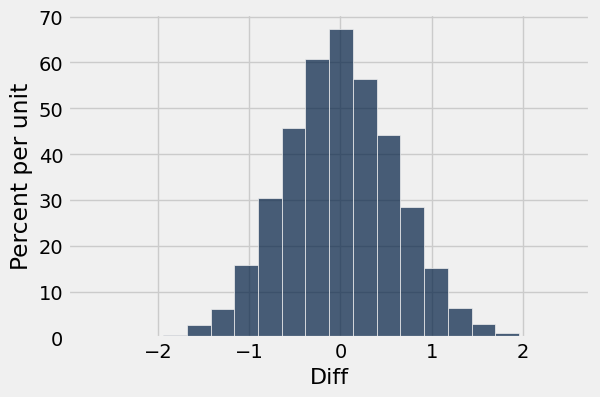

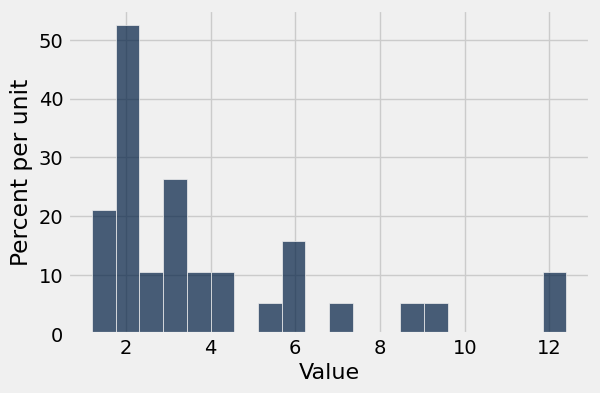

In [15]:
# Based on the Null Hypothesis, the overtime distribution of the Developer's and that of the Tester's is not
# different, from statistical significance viewpoint.  Therefore, we can simulate the distribution of Null Hypothesis
# by combining samples from the Developer's team with those who work in the Tester's team, because both samples are
# drawn from the merged population distribution.
# Therefore, the code below combines these two samples into an "approximate population", from which we use
# computer simulation to generate samples of two groups (i.e., Developers and Testers).
# We can then simulate differences of the two groups due to chances (i.e., Null Hypothesis) by repeating this
# "simulated generation of two groups" many times.

possible_times = np.append(test_team, developer_team)

table_overwork = Table().with_columns("Value", possible_times)

# draw histogram to show the distribution of the over-time of the approximate population formed by combing the two samples.
table_overwork.hist("Value", bins=20)

One thing we noticed is there are quite a wide range of over-time, including 10% with the highest overtime.

Now let's simulate drawing samples from this distribution (with replacement, because the number of samples may be larger than the size of this **approximate population**).

- In each iteration, we randomly sample 17 testers, 17 developers, which is the size of the two groups we had data.
- We can then calculate the difference of the average overtime between the two groups.
- Because the result of each such "simulated run" can be due to "chances", we want to simulate this many times to get a statistical distribution that more clearly reflect the likelihood/probability of different outcome due to chances.


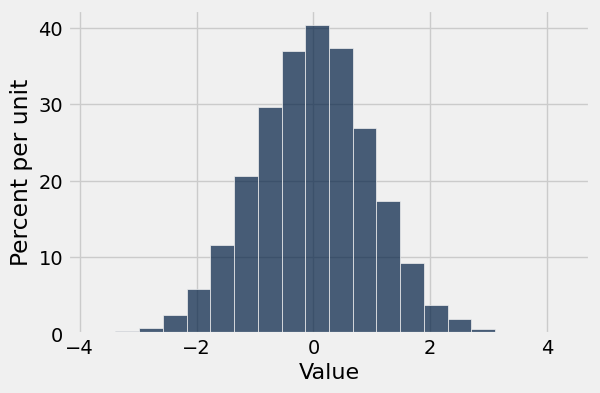

In [16]:
table_simulated_NH= Table().with_columns("Iteration", make_array()).with_columns("Value", make_array())

for i in np.arange(10000):
  # Randomly sample 17 testers and 17 developers
  testers = np.random.choice(possible_times, 17)
  developers = np.random.choice(possible_times, 17)
  # Calculate the difference of their average overtime
  avg_diff = np.average(testers) - np.average(developers)
  table_simulated_NH.append((i, avg_diff))

# draw histogram to show the distribution under the null hypothesis
table_simulated_NH.hist("Value", bins=20)

We then need to compare the observed overtime difference with this simulated overtime difference (based on Null Hypothesis).  

- Recall that we have calculated the observed average overtime between the test team and the developer team.  
- We have saved the result in a variable called `observed_overtime_diff`

In [17]:
# We have calculated EARLIER the difference of the average overtime between the test team and the developer team.
# We saved it in the variable observed_overtime_diff

print("Observed average overtime difference between the testing team and the developer team:", observed_overtime_diff)

Observed average overtime difference between the testing team and the developer team: 0.488235294118


Should the null hypothesis be accepted or rejected? Let us use $p$-value, which is the observed significance level of the test, to help us decide.

The $p$-value is the probability that under the null hypothesis, the test statistic would be equal to or higher than the observed value in the direction that supports the alternative. In another word, it is the probability that
the observed difference is caused by chance, not
real differences of the two groups.

- One way to calculate the p-value, through simulation above, is to calculate the fraction of simulated statistic values (i.e., simulated "difference") that are equal to or higher than the observed value.

The code cell below calculates the $p$-value in our example:

In [18]:
exp_exceed_obs_diff = table_simulated_NH.where("Value", are.above_or_equal_to(observed_overtime_diff) )
exp_exceed_obs_diff.show(5)

Iteration,Value
0,1.64706
2,1.91765
9,1.36471
10,0.535294
13,1.12941


In [19]:
sim_p_value = exp_exceed_obs_diff.num_rows / table_simulated_NH.num_rows

In [20]:
# sim_p_value = np.average(table_simulated_NH.column("Value") > observed_overtime_diff)
print("p-value based on 10K simulation:", sim_p_value)

p-value based on 10K simulation: 0.3103


This result tells us that the probability, based on Null Hypothesis, that two samples from one underlying distribution has an average overtime difference that is at least as high as the one observed is **quite high (31.4%)**.

The rule of thumb for using the $p$-value is:
*   $p$-value > 5\%: sample is consistent with the null hypothesis; conclusion is to accept the null hypothesis.
*   5\% > $p$-value > 1%: sample is not consistent with the null hypothesis; conclusion is to reject the null hypothesis (i.e. accept the alternative hypothesis); result is statistically significant.
*   1\% > $p$-value: sample is highly inconsistent with the null hypothesis; conclusion is to reject the null hypothesis; result is highly statistically significant.

### Problem 2B: Conclusion for the Overwork Time Hypothesis Test (0.2 points)

What should be our conclusion for the overtime hypothesis test based on the observed $p$-value?

To accept the null hypothesis as the p value is above 5%.

### Solution for Problem 2B: Write your answer to Problem 2B in this text cell.
Solution for Problem 2B: To accept the null hypothesis as the p value is above 5%.

## Part 3: A/B Testing

A/B testing is a form of hypothesis testing that allows you to make comparisons between two distributions (e.g., one with an intervention, the other without an intervention).

Here are the steps in an A/B hypothesis test:


1.   Define a null and alternate hypothesis
2.   Choose a test statistic (typically the difference in means between two groups)
3.   Find the observed value of the test statistic
4.  Sample from the population under the null hypothesis to simulate the test statistic, and repeat many times to obtain the distribution of the simulated test statistic under the null hypothesis
5.   Calculate the $p$-value based on your observed and simulated test statistics
6.   Use the $p$-value and $p$-value cutoff to draw a conclusion about the null hypothesis

As you can see, the steps are quite similar to what we have learned in Part 2 of this assignment. Now let's look at an example using a *natural experiment*. Different from a randomized controlled experiment, a natural experiment happens when something other than experimental design applies a treatment to one group and not to another (control) group, and we have some hope that the treatment and control groups do not have any other systematic differences.

The natural experiment in this example makes it possible for us to perform a hypothesis testing that explores whether instituting capital punishment for murder actually reduces the number of murders. That is, we want to know whether capital punishment causes a change in the murder rate.

The natural experiment is this: in 1972, a Supreme Court decision called Furman v. Georgia banned capital punishment throughout the U.S. Suddenly, many states went from having capital punishment to not having capital punishment.

In the interest of finding out whether and how murder rates changed before and after the court decision, we will define our A/B hypothesis test as follows:

**Population:** All the states that had capital punishment before the 1972 abolition. (There is no control group for the states that already lacked capital punishment in 1972, so we must omit them.) This includes all U.S. states except Alaska, Hawaii, Maine, Michigan, Wisconsin, and Minnesota.

**Treatment group:** The states in that population, in 1973 (the year after 1972).

**Control group:** The states in that population, in 1971 (the year before 1972).

**Null hypothesis:** Murder rates in 1971 and 1973 come from the same distribution.

**Alternative hypothesis:** Murder rates were higher in 1973 than they were in 1971.

The alternative hypothesis is related to our suspicion that murder rates increase when capital punishment is banned.

#### Data

The main data source for this lab comes from a [paper](http://cjlf.org/deathpenalty/DezRubShepDeterFinal.pdf) by three researchers, Dezhbakhsh, Rubin, and Shepherd.  The dataset contains rates of various violent crimes for every year 1960-2003 (44 years) in every U.S. state.  The researchers compiled the data from the FBI's Uniform Crime Reports.

Since crimes are committed by people, not states, we need to account for the number of people in each state when we are looking at state-level data.  Murder rates are calculated as follows:
$$\text{murder rate for state X in year Y} = \frac{\text{number of murders in state X in year Y}}{\text{population in state X in year Y}} \times 100,\!000$$

(Murder is fortunately rare, so we multiply by 100,000 just to avoid dealing with tiny numbers.)

In [21]:
murder_rates = Table.read_table('crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
murder_rates.set_format("Population", NumberFormatter)
print("Number of rows in table:", murder_rates.num_rows)

Number of rows in table: 2200


In [22]:
murder_rates.show(5)

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4


Murder rates vary over time, and different states exhibit different trends. The rates in some states change dramatically from year to year, while others are quite stable. Let's plot a few, just to see the variety.


### Problem 3: Line Plot to Compare Murder Rates in Two States over Time (0.5 points)

Draw a line plot with years on the horizontal axis and murder rates on the
vertical axis. Include two lines: one for Alaska murder rates and one for Minnesota murder rates.

*Hint: You will need to create a table with three columns: one for years, one for murder rates in Alaska, and one for murder rates in Minnesota. Then, you can use a single call of function `plot` on the table to draw the plot. This table should have the following structure:*

| `Year` | `Murder rate in Alaska` | `Murder rate in Minnesota` |
|------|-----------------------|--------------------------|
| 1960 | 10.2                  | 1.2                      |
| 1961 | 11.5                  | 1                        |
| 1962 | 4.5                   | 0.9                      |
...

*If you plot it correctly, you should see [this](https://drive.google.com/file/d/1I1jrnH2l9S0GkggBxHewUaw2IkeT_q1W/view?usp=sharing).*


### Write your solution to Problem 3 by following the following steps

- 1. Sort table murder_rates by year and sort the sorted table in a variable ``sorted_table``
- 2. Create a new table from sorted murder_rates that includes only murder rates of Alaska; do the same for Minnesota.
- 3. Relabel the ``Murder Rate`` column for Alaska table into ``Alaska Murder Rate``, and the ``Murder Rate`` column for Minnesota table into ``Minnesota Murder Rate``.
- 4. Create a new table using Table().with_columns with three columns:
-- "Year" (data from the Year column of the Alaska table)
-- "Murder rate in Alaska" (data from the Muder Rate column of the Alaska table)
-- "Murder rate in Minnesota" (data from the Muder Rate column of the Minnesota table)

In [23]:
# step 1
sorted_table = murder_rates.sort("Year")
sorted_table.show(5)

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alabama,1960,"3,266,740",12.4
Arkansas,1960,"1,786,272",8.5
Arizona,1960,"1,302,161",6
California,1960,"15,717,204",3.9


In [24]:
# step 2
Alaska_murder_rates= sorted_table.where("State", are.equal_to("Alaska"))
Minnesota_murder_rates = sorted_table.where("State", are.equal_to("Minnesota"))
Alaska_murder_rates.show(5)

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4


In [25]:
Minnesota_murder_rates.show(5)

State,Year,Population,Murder Rate
Minnesota,1960,"3,413,864",1.2
Minnesota,1961,"3,470,000",1
Minnesota,1962,"3,475,000",0.9
Minnesota,1963,"3,500,000",1.2
Minnesota,1964,"3,521,000",1.4


In [26]:
Alaska_MR_year = Alaska_murder_rates.relabel("Murder Rate", "Alaska Murder Rate")
Alaska_MR_year_2col = Alaska_MR_year.select("Year", "Alaska Murder Rate")

In [27]:
Alaska_MR_year_2col.show(5)

Year,Alaska Murder Rate
1960,10.2
1961,11.5
1962,4.5
1963,6.5
1964,10.4


In [28]:
Minnesota_MR_year = Minnesota_murder_rates.relabel("Murder Rate", "Minnesota Murder Rate")
Minnesota_MR_year_2col = Minnesota_MR_year.select("Year", "Minnesota Murder Rate")

In [29]:
Minnesota_MR_year_2col.show(5)

Year,Minnesota Murder Rate
1960,1.2
1961,1
1962,0.9
1963,1.2
1964,1.4


In [30]:
joined_table = Alaska_MR_year_2col.join("Year", Minnesota_MR_year_2col)

In [31]:
joined_table.show(4)

Year,Alaska Murder Rate,Minnesota Murder Rate
1960,10.2,1.2
1961,11.5,1
1962,4.5,0.9
1963,6.5,1.2


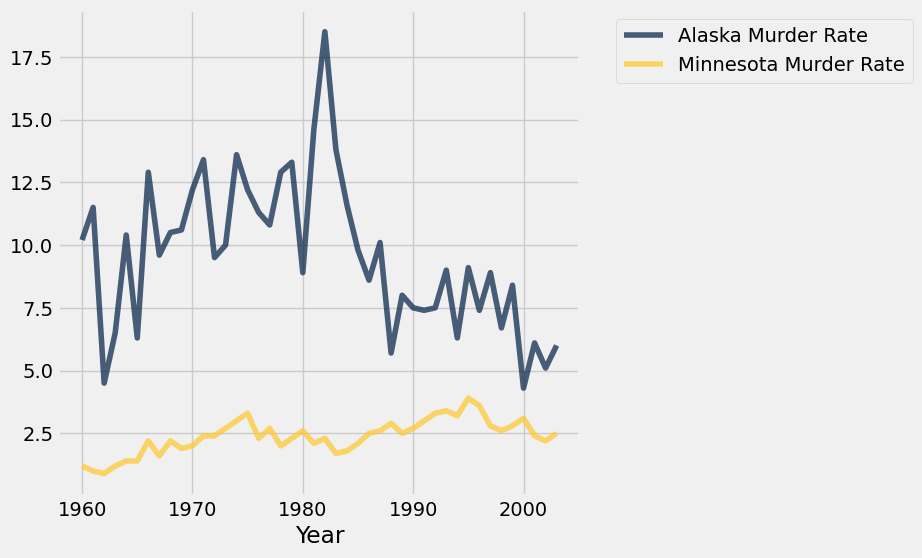

In [32]:
joined_table.plot("Year")

## A/B Hypothesis Test

Now let's go back to the hypothesis test to answer our original question.

**Population:** All the states that had capital punishment before the 1972 abolition. (There is no control group for the states that already lacked capital punishment in 1972, so we must omit them.) This includes all U.S. states except Alaska, Hawaii, Maine, Michigan, Wisconsin, and Minnesota.

**Treatment group:** The states in that population, in 1973 (the year after 1972).

**Control group:** The states in that population, in 1971 (the year before 1972).

**Null hypothesis:** Murder rates in 1971 and 1973 come from the same distribution.

**Alternative hypothesis:** Murder rates were higher in 1973 than they were in 1971.



We first extract relevant data for the chosen population:

In [33]:
# make a list of states that did not have capital punishment before the 1972 abolition (these states will be excluded from the chosen population)
non_capital_punishment_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')

print("All data:", murder_rates.num_rows)

# update murder_rates table to contain only states from the population
murder_rates = murder_rates.where('State', are.not_contained_in(non_capital_punishment_states))
print("Data from states with capital punishment:", murder_rates.num_rows)

All data: 2200
Data from states with capital punishment: 1936


The next step in the test is choosing a test statistic, which is typically the difference in means between the treatment group and the control group. In this example, it is the difference in means between the postban and preban murder rates:

In [34]:
# array containing postban rates
postban_rates = murder_rates.where('Year', are.equal_to(1973)).column('Murder Rate')

# array containing preban rates
preban_rates = murder_rates.where('Year', are.equal_to(1971)).column('Murder Rate')

# calculate the observed test statistic
observed_diff = abs(np.average(postban_rates) - np.average(preban_rates))
print('Observed test statistic:', observed_diff)

Observed test statistic: 0.606818160068


### Problem 4: Complete the A/B Test by Completing the Remaining Steps (0.8 points)

Recall the steps in A/B testing:

1.   Choose a test statistic (typically the difference in means between two groups) based on the Null/Alternative Hypothesis you wish to test.
2.   Find the value of the observed test statistic
3.   Create an approximate population of Null Hypothesis by combining the samples of the two groups into one.
4.  Simulate "random sampling of two groups from the approximate population" based on (1) your choice of sample size, and (2) the number of "simulation experiments" (i.e., the number of iterations) to obtain a distribution  of the average differences between the two samples.
5.   Calculate the $p$-value based on the distributions and your observed difference.
6.   Use the $p$-value and an appropriate $p$-value cutoff to draw a conclusion about the null hypothesis

For the capital punishment test, steps 1-2 above have been completed. Please write  code to complete steps 3-6 and draw a conclusion (about whether to accept or reject the null hypothesis) based on the test result. The points for this problem will be assigned as follows:
*   Step 3: 0.2 points (Problem 4A)
*   Step 4: 0.3 points (Problem 4B)
*   Step 5: 0.2 points (Problem 4C)
*   Step 6: 0.1 points (Problem 4D)



In [35]:
# Complete your code for Problem 4 by filling in the missing pieces below.

In [36]:

# Problem 4A:
MR_population = np.append(preban_rates, postban_rates)

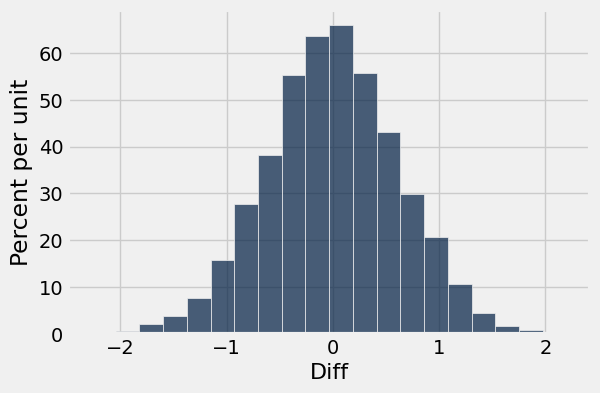

In [37]:
#Problem 4B:
table_simulated_NH2= Table().with_columns("Iteration", make_array()).with_columns("Diff", make_array())

sample_size = 100
for i in np.arange(10000):
  # Randomly sample 1000 testers and 17 developers
  pre_ban_samples = np.random.choice(MR_population, sample_size)
  post_ban_samples = np.random.choice(MR_population, sample_size)
  # Calculate the difference of their average overtime
  avg_MR_diff = np.average(pre_ban_samples) - np.average(post_ban_samples)
  table_simulated_NH2.append((i, avg_MR_diff))

# draw histogram to show the distribution under the null hypothesis
table_simulated_NH2.hist("Diff", bins=20)

In [38]:
exp_exceed_obs_diff2 = table_simulated_NH2.where("Diff", are.above_or_equal_to(observed_diff) )
exp_exceed_obs_diff2.show(5)

Iteration,Diff
1,1.198
4,1.324
14,0.888
16,0.608
21,0.668


In [40]:
# Problem 4C:
sim_p_value = exp_exceed_obs_diff2.num_rows / table_simulated_NH2.num_rows

In [41]:
# sim_p_value = np.average(table_simulated_NH.column("Value") > observed_overtime_diff)
print("p-value based on 10K simulation:", sim_p_value)

p-value based on 10K simulation: 0.1622


# Answer to Problem 4D:
Write your conclusion for Problem 4D based on the computed p-value in this text cell.

Seeing as how the p-value is 16.2% which is > 5%, the sample is consisten with the null hypothesis. So we accept the null hypothesis that murder rates in 1971 and 1973 come from the same distribution.